# Info 2950 Final Project - Melanie Chen (mc2234)

## Analyzing Apple App Store and Google Play Store Data

## Phase III

### Project Overview / Background Summary

From Phase II of the project, we outlined several research questions we hoped to answer with our data analysis which were:

**Research Questions:** 

1. Do certain app attributes lead to higher user ratings / better reviews?

2. Do certain app attributes lead to better app success (measured in number of installs / downloads)?

3. How can we use specific app attributes to predict potential user ratings?

4. Is it possible for "fake" apps to simulate high ratings behavior and become successful?

5. Can quality be observed from user ratings? If so, how do Apple Only, Google Only, and Dual Support Apps compare in terms of potential quality (user rating) differences?

Through our data exploration and visualization process, we identified 7 key variables of interest that could potentially influence app ratings to incorporate into our model:

**Specific Variables of Interest for our Model**

    - primary_genre_a
    - reviews
    - installs_g
    - dual_support
    - editors_choice_g
    - free_a
    - price_a

### Pre-Registration of Analyses

In order to analyze the relationship between these 7 variables listed above and the user rating of an app, we shall pre-register the following two analyses for our final report:

1. Multivariable Linear Regression Model

2. K-Means Cluster Analysis

In the following sections, we shall discuss the reasoning behind implementing these two types of analyses in terms of real world applications and the value of any discoveries and findings that our final results will have on the discussion of key app attributes and characteristics for future app creators and App Store ranking algorithms.

### Multivariable Linear Regression Model

We want to implement a multivariable linear regression model to help predict the effect of the 7 key variables of interest on the dependent variable user app ratings.

Due to the limitations of our dataset mentioned previously, the fact that certain apps only have Apple Only or Google Only characteristics we will have to split our regression analyses into 3 separate multivariable linear regression models:

**1. Analyzing impact of 6 key variables (not including `dual_support`) on `rating` variable for apps with dual support.**
   - We do this by creating a sub-dataframe `dual_only` below for future analysis.
   - Since dual supported apps are the only ones that have both Apple and Google characteristics we are able to analyze which app characteristics have the largest impact on an app's user rating.
   - Note: We omit the `dual_support` variable from our linear regression since it does not provide any additional information given that all apps analyzed have dual support in this case.
    
**2. Analyzing impact of Apple specific characteristics (`primary_genre_a`, `reviews`, `free_a`, `price_a`) and `dual_support` on `average_user_rating_a` for all Apple apps (dual and non-dual support apps).**
   - We do this by creating a sub-dataframe `all_apple` below for future analysis.
   - Note: We omit all Google specific characteristics since the `apple_only` apps would not have any of these characteristics and would be dropped by the regression model.
    
**3. Analyzing impact of Google specific characteristics (`category_g`, `reviews`, `installs_g`, `editors_choice_g`) and `dual_support` on `rating_g` for all Google apps (dual and non-dual support apps).**
   - We do this by creating a sub-dataframe `all_google` below for future analysis.
   - Note: We omit all Apple specific characteristics since the `google_only` apps would not have any of these characteristics and would be dropped by the regression model.

#### Regression Models - Set-Up Verification

**[Note:]** All code below is used for model collinearity checks. We have not run any models yet or hypothesis tests to check for significance before pre-registration.

In [1]:
#Loading Libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
### Reading in Cleaned Analysis File

all_apps = pd.read_csv("all_apps_clean.csv", low_memory = False)

### Creating 3 separate dataframes for each Multivariable Linear Regression Model Set-Up / Future Analysis

all_apple = all_apps[(all_apps['app_id_a'].notna())]

all_google = all_apps[(all_apps['app_id_g'].notna())]

dual_only = all_apps[all_apps['dual_support'] == True]

In [3]:
### Removing Unnecessary App Attribute Columns from new Dataframe Subsets

apple_features = ['app_id_a', 'app_name', 'appstore_url_a', 'primary_genre_a',
       'content_rating_a', 'size_bytes_a', 'required_ios_version_a',
       'released_a', 'updated_a', 'version_a', 'price_a', 'currency_a',
       'free_a', 'developerid_a', 'developer_a', 'developer_url_a',
       'developer_website_a', 'average_user_rating_a', 'reviews_a',
       'current_version_score_a', 'current_version_reviews_a', 'dual_support', 'app_type', 'rating', 'reviews']
google_features = ['app_name', 'app_id_g', 'category_g', 'rating_g', 'rating_count_g',
       'installs_g', 'minimum_installs_g', 'maximum_installs_g', 'free_g',
       'price_g', 'currency_g', 'size_g', 'minimum_android_g',
       'developer_id_g', 'developer_website_g', 'developer_email_g',
       'released_g', 'last_updated_g', 'content_rating_g', 'privacy_policy_g',
       'ad_supported_g', 'in_app_purchases_g', 'editors_choice_g',
       'scraped_time_g','dual_support', 'app_type', 'rating', 'reviews']

all_apple = all_apple[apple_features]

all_google = all_google[google_features]

In [4]:
### Creating Function for each Regression Model Set-Up / Collinearity Check

def reg_model_setup (ind_vars, cat_vars, heat_vars, df):
    
    ### Keeping Only Columns Necessary for Regression
    df = df[ind_vars] 
    
    ### Generate Dummy Indicator Variables for Categorical Variables
    df = pd.get_dummies(data = df, columns = cat_vars, drop_first = True) 
    
    ### Checking for Collinearity in Model
    print("Correlation Matrix: \n")
    display(df[df.columns].corr())
    
    ## Visualize Correlation
    print("Heat Map Visualization: \n")
    sns.heatmap(df[heat_vars].corr(), center=0, cmap='coolwarm')
    plt.tight_layout()
    plt.show()
    
    return (df)

#### Regression 1 - Dual Support Only Apps

Our model would give us app `rating` as a function of our 7 independent variables: `primary_genre_a`, `reviews`, `installs_g`, `editors_choice_g`, `free_a`, and `price_a`.

$$\text{rating} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{free_a} + \beta_6 \text{price_a} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `primary_genre_a`, `editors_choice_g`, and `free_a`. 

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically.

Correlation Matrix: 



,reviews,installs_g,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,...,primary_genre_a_Reference,primary_genre_a_Shopping,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,editors_choice_g_True,free_a_True
reviews,1.000000,0.597758,-0.008657,-0.009819,-0.000413,-0.012069,0.002547,-0.015465,-0.000692,0.019168,...,-0.003211,-0.002420,0.064903,-0.008381,-0.000541,-0.002231,-0.005381,-0.005355,0.155215,0.012035
installs_g,0.597758,1.000000,-0.007828,-0.007785,-0.000364,-0.010217,0.002512,-0.017796,-0.007209,0.000862,...,-0.001134,-0.006006,0.075791,-0.007135,-0.000440,-0.001193,0.009080,-0.005133,0.068502,0.010978
price_a,-0.008657,-0.007828,1.000000,-0.027302,-0.001169,0.046755,-0.016702,-0.049567,-0.020570,0.054589,...,0.028098,-0.025294,-0.016143,0.001108,-0.001169,-0.022330,-0.016977,-0.001922,0.007104,-0.600830
primary_genre_a_Business,-0.009819,-0.007785,-0.027302,1.000000,-0.001548,-0.044774,-0.043585,-0.070888,-0.031406,-0.156874,...,-0.024355,-0.035702,-0.024856,-0.029684,-0.001548,-0.031764,-0.044686,-0.020345,-0.019303,0.043879
primary_genre_a_Developer Tools,-0.000413,-0.000364,-0.001169,-0.001548,1.000000,-0.001663,-0.001619,-0.002633,-0.001166,-0.005826,...,-0.000905,-0.001326,-0.000923,-0.001102,-0.000058,-0.001180,-0.001660,-0.000756,-0.000975,0.001946
primary_genre_a_Education,-0.012069,-0.010217,0.046755,-0.044774,-0.001663,1.000000,-0.046813,-0.076138,-0.033732,-0.168492,...,-0.026159,-0.038346,-0.026697,-0.031882,-0.001663,-0.034117,-0.047995,-0.021852,-0.015172,-0.076088
primary_genre_a_Entertainment,0.002547,0.002512,-0.016702,-0.043585,-0.001619,-0.046813,1.000000,-0.074116,-0.032836,-0.164017,...,-0.025464,-0.037327,-0.025988,-0.031035,-0.001619,-0.033211,-0.046720,-0.021272,-0.023003,0.015030
primary_genre_a_Finance,-0.015465,-0.017796,-0.049567,-0.070888,-0.002633,-0.076138,-0.074116,1.000000,-0.053406,-0.266765,...,-0.041416,-0.060711,-0.042268,-0.050477,-0.002633,-0.054015,-0.075988,-0.034598,-0.043187,0.085264
primary_genre_a_Food & Drink,-0.000692,-0.007209,-0.020570,-0.031406,-0.001166,-0.033732,-0.032836,-0.053406,1.000000,-0.118187,...,-0.018349,-0.026897,-0.018726,-0.022363,-0.001166,-0.023931,-0.033666,-0.015328,-0.013735,0.034715
primary_genre_a_Games,0.019168,0.000862,0.054589,-0.156874,-0.005826,-0.168492,-0.164017,-0.266765,-0.118187,1.000000,...,-0.091652,-0.134352,-0.093538,-0.111705,-0.005826,-0.119534,-0.168159,-0.076563,0.121297,-0.153184


Heat Map Visualization: 



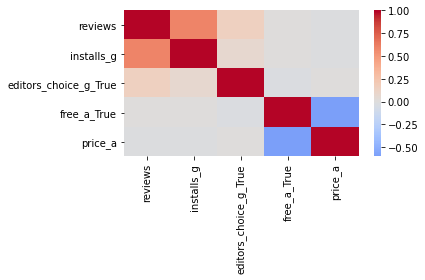

In [5]:
### Verifying Regression 1 Model Set-Up

dual_ind_vars = ['primary_genre_a', 'reviews', 'installs_g', 'editors_choice_g', 'free_a', 'price_a']
dual_cat_vars = ['primary_genre_a', 'editors_choice_g', 'free_a']
dual_heat_vars = ['reviews', 'installs_g', 'editors_choice_g_True','free_a_True', 'price_a']

dual_only = reg_model_setup(dual_ind_vars, dual_cat_vars, dual_heat_vars, dual_only)

[Note:] We do not include our `primary_genre_a` indicator variables in the correlation matrix as the dummy genre variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all dual support apps.

#### Regression 2 - All Apple Apps

Our model would give us app `average_user_rating_a` as a function of our 5 independent variables: `primary_genre_a`, `reviews`,`free_a`, `price_a`, and `dual_support`.

$$\text{average_user_rating_a} = \beta_1 \text{primary_genre_a} + \beta_2 \text{reviews} + \beta_3 \text{free_a} + \beta_4 \text{price_a} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `primary_genre_a`, `free_a`, and `dual_support`. 

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically.

Correlation Matrix: 



,reviews,price_a,primary_genre_a_Business,primary_genre_a_Developer Tools,primary_genre_a_Education,primary_genre_a_Entertainment,primary_genre_a_Finance,primary_genre_a_Food & Drink,primary_genre_a_Games,primary_genre_a_Graphics & Design,...,primary_genre_a_Reference,primary_genre_a_Shopping,primary_genre_a_Social Networking,primary_genre_a_Sports,primary_genre_a_Stickers,primary_genre_a_Travel,primary_genre_a_Utilities,primary_genre_a_Weather,free_a_True,dual_support_True
reviews,1.000000,-0.004931,-0.004047,-0.000668,-0.008136,-0.000831,-0.004347,0.002011,0.010241,-0.002326,...,-0.002956,0.001270,0.025325,-0.003945,-0.001528,0.001348,-0.005141,-0.001677,0.009141,0.056506
price_a,-0.004931,1.000000,0.004509,0.015005,0.035850,-0.010443,-0.024650,-0.013777,-0.032749,0.001225,...,0.022128,-0.021971,-0.012475,0.002247,-0.001026,-0.007696,0.005270,0.008190,-0.479336,-0.021958
primary_genre_a_Business,-0.004047,0.004509,1.000000,-0.004294,-0.042945,-0.042034,-0.048184,-0.024007,-0.126763,-0.011644,...,-0.023686,-0.030330,-0.026287,-0.024066,-0.006262,-0.025137,-0.043912,-0.016418,0.016836,0.034368
primary_genre_a_Developer Tools,-0.000668,0.015005,-0.004294,1.000000,-0.005947,-0.005821,-0.006673,-0.003325,-0.017556,-0.001613,...,-0.003280,-0.004200,-0.003640,-0.003333,-0.000867,-0.003481,-0.006081,-0.002274,-0.013871,-0.013004
primary_genre_a_Education,-0.008136,0.035850,-0.042945,-0.005947,1.000000,-0.058216,-0.066734,-0.033249,-0.175562,-0.016127,...,-0.032805,-0.042006,-0.036406,-0.033331,-0.008673,-0.034814,-0.060817,-0.022739,-0.043421,-0.026300
primary_genre_a_Entertainment,-0.000831,-0.010443,-0.042034,-0.005821,-0.058216,1.000000,-0.065319,-0.032543,-0.171839,-0.015785,...,-0.032109,-0.041115,-0.035634,-0.032624,-0.008489,-0.034076,-0.059527,-0.022257,0.009601,-0.026992
primary_genre_a_Finance,-0.004347,-0.024650,-0.048184,-0.006673,-0.066734,-0.065319,1.000000,-0.037305,-0.196983,-0.018095,...,-0.036807,-0.047131,-0.040848,-0.037398,-0.009731,-0.039062,-0.068237,-0.025513,0.058483,0.087928
primary_genre_a_Food & Drink,0.002011,-0.013777,-0.024007,-0.003325,-0.033249,-0.032543,-0.037305,1.000000,-0.098142,-0.009015,...,-0.018338,-0.023482,-0.020352,-0.018633,-0.004848,-0.019461,-0.033997,-0.012711,0.024947,0.021466
primary_genre_a_Games,0.010241,-0.032749,-0.126763,-0.017556,-0.175562,-0.171839,-0.196983,-0.098142,1.000000,-0.047603,...,-0.096831,-0.123992,-0.107462,-0.098385,-0.025600,-0.102763,-0.179516,-0.067119,0.000249,0.037192
primary_genre_a_Graphics & Design,-0.002326,0.001225,-0.011644,-0.001613,-0.016127,-0.015785,-0.018095,-0.009015,-0.047603,1.000000,...,-0.008895,-0.011390,-0.009871,-0.009038,-0.002352,-0.009440,-0.016490,-0.006166,0.004285,-0.030789


Heat Map Visualization: 



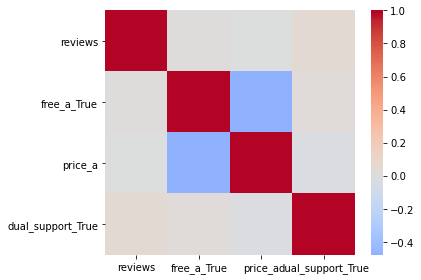

In [6]:
### Verifying Regression 2 Model Set-Up

apple_ind_vars = ['primary_genre_a', 'reviews', 'free_a', 'price_a', 'dual_support']
apple_cat_vars = ['primary_genre_a', 'free_a', 'dual_support']
apple_heat_vars = ['reviews', 'free_a_True', 'price_a', 'dual_support_True']

all_apple = reg_model_setup(apple_ind_vars, apple_cat_vars, apple_heat_vars, all_apple)

[Note:] We do not include our `primary_genre_a` indicator variables in the correlation matrix as the dummy genre variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all Apple apps.

#### Regression 3 - All Google Apps

Our model would give us app `rating_g` as a function of our 5 independent variables: `category_g`, `reviews`, `installs_g`, `editors_choice_g`, and `dual_support`.

$$\text{rating_g} = \beta_1 \text{category_g} + \beta_2 \text{reviews} + \beta_3 \text{installs_g} + \beta_4 \text{editors_choice_g} + \beta_5 \text{dual_support} + \beta_0 + X + \epsilon$$

where $\{\beta_1, \beta_2, \beta_3, \beta_4, \beta_5 \}$ represent our coefficients of interest, $\beta_0$ is our intercept, $X$ is our control variables, and $\epsilon$ is our error term.

Since linear regressions require numeric inputs, we shall generate dummy indicator variables for our categorical variables `category_g`, `editors_choice_g`, and `dual_support`.

We shall also check for any collinearity in our model by calculating a correlation matrix for our independent variables of interest. That is, if any 2 independent variables in our regression are highly correlated we should not keep both as it would only add redundant information into our model. We can also visualize the large table of numbers in a heatmap which makes it easier to see the correlation graphically.

Correlation Matrix: 



,reviews,installs_g,category_g_Adventure,category_g_Arcade,category_g_Art & Design,category_g_Auto & Vehicles,category_g_Beauty,category_g_Board,category_g_Books & Reference,category_g_Business,...,category_g_Sports,category_g_Strategy,category_g_Tools,category_g_Travel & Local,category_g_Trivia,category_g_Video Players & Editors,category_g_Weather,category_g_Word,editors_choice_g_True,dual_support_True
reviews,1.000000,0.534926,0.000177,0.004361,-0.001640,-0.001877,-0.001207,0.000284,-0.005928,-0.002750,...,0.001185,0.009781,-0.001096,-0.001327,-0.000477,0.007317,-0.000857,0.000524,0.135398,0.051876
installs_g,0.534926,1.000000,-0.001322,0.003011,-0.001308,-0.000912,-0.000889,-0.000137,-0.005299,-0.002564,...,-0.001200,0.000670,0.009350,0.000863,-0.001392,0.008333,-0.000276,-0.000700,0.058887,0.027782
category_g_Adventure,0.000177,-0.001322,1.000000,-0.020080,-0.011306,-0.011626,-0.007148,-0.012147,-0.033651,-0.022616,...,-0.022547,-0.013064,-0.040740,-0.020465,-0.011707,-0.015780,-0.012360,-0.011552,0.008075,0.003165
category_g_Arcade,0.004361,0.003011,-0.020080,1.000000,-0.011116,-0.011431,-0.007028,-0.011944,-0.033087,-0.022237,...,-0.022169,-0.012845,-0.040057,-0.020123,-0.011511,-0.015516,-0.012153,-0.011359,0.000670,0.030698
category_g_Art & Design,-0.001640,-0.001308,-0.011306,-0.011116,1.000000,-0.006436,-0.003957,-0.006725,-0.018629,-0.012520,...,-0.012482,-0.007232,-0.022553,-0.011329,-0.006481,-0.008736,-0.006842,-0.006395,0.000533,-0.011975
category_g_Auto & Vehicles,-0.001877,-0.000912,-0.011626,-0.011431,-0.006436,1.000000,-0.004069,-0.006915,-0.019157,-0.012875,...,-0.012836,-0.007437,-0.023192,-0.011651,-0.006664,-0.008983,-0.007036,-0.006576,-0.003173,-0.005552
category_g_Beauty,-0.001207,-0.000889,-0.007148,-0.007028,-0.003957,-0.004069,1.000000,-0.004251,-0.011778,-0.007915,...,-0.007891,-0.004572,-0.014259,-0.007163,-0.004097,-0.005523,-0.004326,-0.004043,-0.000122,-0.006970
category_g_Board,0.000284,-0.000137,-0.012147,-0.011944,-0.006725,-0.006915,-0.004251,1.000000,-0.020016,-0.013452,...,-0.013411,-0.007770,-0.024232,-0.012173,-0.006963,-0.009386,-0.007352,-0.006871,-0.002709,0.006804
category_g_Books & Reference,-0.005928,-0.005299,-0.033651,-0.033087,-0.018629,-0.019157,-0.011778,-0.020016,1.000000,-0.037265,...,-0.037152,-0.021526,-0.067130,-0.033722,-0.019290,-0.026002,-0.020366,-0.019035,-0.009435,-0.037360
category_g_Business,-0.002750,-0.002564,-0.022616,-0.022237,-0.012520,-0.012875,-0.007915,-0.013452,-0.037265,1.000000,...,-0.024968,-0.014467,-0.045115,-0.022663,-0.012964,-0.017475,-0.013687,-0.012793,-0.003882,0.013735


Heat Map Visualization: 



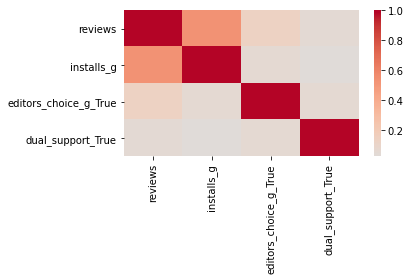

In [7]:
### Verifying Regression 3 Model Set-Up

google_ind_vars = ['category_g', 'reviews', 'installs_g', 'editors_choice_g', 'dual_support']
google_cat_vars = ['category_g', 'editors_choice_g', 'dual_support']
google_heat_vars = ['reviews', 'installs_g', 'editors_choice_g_True', 'dual_support_True']

all_google = reg_model_setup(google_ind_vars, google_cat_vars, google_heat_vars, all_google)

[Note:] We do not include our `category_g` indicator variables in the correlation matrix as the dummy category variables would not be correlated with each other and would only add a lot of uninformative zero correlation gray squares to our heatmap.

From the above correlation matrix and heat map visualization, we find there is no strong / high correlation between any pairs of our independent variables which matches general intuition. Thus, we can safely include all our variables in our future multivariable linear regression model for all Google apps.

#### Multivariable Regressions Summary

Thus, after setting-up each of our 3 multivariable linear regression models and checking for any instances of collinearity we conclude that we can safely use our regression equation models stated above in our future analysis. In terms of real world applications, the results from our 3 models will be able to reveal information about how ratings are influenced by the selected app attributes of interest and the latter 2 Apple and Google specific models will be able to analyze if / how the `dual_support` feature will influence user ratings. These findings will be informative for app creators to decide which significant app attributes they should focus on when aiming to build a successful app and will help users also identify which apps are worth downloading, especially if `dual_support` is a useful signal to identify app quality.

### K-Means Cluster Analysis

We want to implement a K-Means Cluster Analysis to predict which apps are dual supported within Apple apps and Google apps separately.

1. Apple apps dataframe (minus `dual_only` column which has true label) -> cluster into $K=2$ clusters to predict what characteristics dual apps typically comprise of using only Apple specific characteristics variables.
2. Google apps dataframe (minus `dual_only` column which has true label) -> cluster into $K=2$ clusters to predict what characteristics dual apps typically comprise of using only Google specific characteristic variables.

We will be able to compare the results of our K-Means clustering to their true labels (`dual_only` column) to see how accurate our prediction model is and generalize the findings of what groups of characteristics define a dual supported app to compare if there is any differentiation in terms of app quality that help them stand apart. In terms of real world applications, our findings of what typical characteristics define a `dual_support` app can help app creators better understand relationships between specific app attributes that correlate with whether or not an app has multi-platform support and what impact that has on overall app quality and overall success.

### Questions for Reviewers

1. Do you have any advice for me in terms of the set-up I outlined for my pre-registered models?

2. Are there any real world applications from these models that would be interesting to review upon running my analyses that I overlooked in my discussion above? 